# Olivia-Finder introduction

## 0 - Previous requirements

We make sure to have the necessary units installed

In [ ]:
%pip install -r requirements.txt

## 1 - DataSource

The class **DataSource** provides an interface for the obtaining of data from the different existing Packs managers.

A datasource can implement classes:

- **Scraper**, to obtain the data directly from the website of the package manager
- **CSVNetwork**, to obtain the data from a CSV file

In this example we will instantize the desired implementation of data source class

A continuacion se muestran algunas de sus funcionalidades mas relevantes

### Data obtaining via web scarping

In the first place we import the implementation of the data source we want, for this example we will use the Bioconductor Scraper

In [1]:
from olivia_finder.scraping.bioconductor import BiocScraper

In [4]:
bioc_scraper_ds = BiocScraper()

Show relevant information about the data source

In [4]:
print(bioc_scraper_ds.get_info())

Name: Bioconductor
Description: Scraper class implementation for the Bioconductor package network


Get a list with the name of the packages obtained from this source

En concreto la clase BiocScraper obtiene la lista de paqutes desde la url:

-   https://bioconductor.org/packages/release/BiocViews.html#___Software

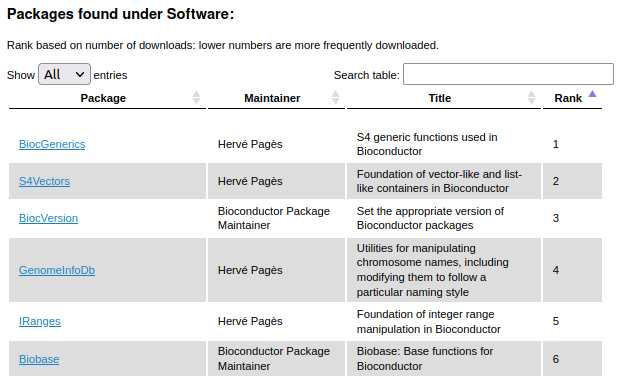

Cada implementacion concreta de un Scraper deberá de gestionar por si misma este proceso

In [6]:
package_list = bioc_scraper_ds.obtain_package_names()
package_list[:10]

['ABSSeq',
 'ABarray',
 'ACE',
 'ACME',
 'ADAM',
 'ADAMgui',
 'ADImpute',
 'ADaCGH2',
 'AGDEX',
 'AIMS']

We can obtain the data from a specific package, for example the **`DeepBlueR`** package

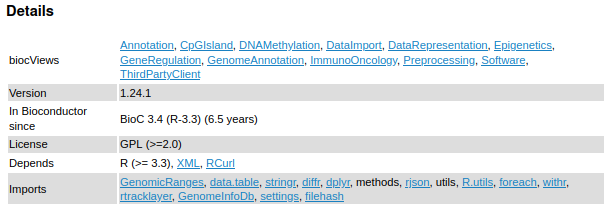

In [2]:
# We can activate the logger if we need it
from olivia_finder.util.logger import UtilLogger
UtilLogger.enable_logger()

In [7]:
deepbluer = bioc_scraper_ds.obtain_package_data("DeepBlueR")
deepbluer

2023-03-13 21:18:59 [   DEBUG] Scraping package DeepBlueR (logger.py:96)
2023-03-13 21:18:59 [   DEBUG] Getting next proxy (logger.py:96)
2023-03-13 21:18:59 [   DEBUG] Proxy list rotated, using 202.29.218.138:4153, next will be 185.162.230.201:80 (logger.py:96)
2023-03-13 21:18:59 [   DEBUG] Using proxy: {'http': 'http://202.29.218.138:4153'} (logger.py:96)
2023-03-13 21:18:59 [   DEBUG] Getting next useragent (logger.py:96)
2023-03-13 21:18:59 [   DEBUG] Using user agent: Mozilla/5.0 (Linux; Android 4.4.2; RCT6203W46 Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.84 Safari/537.36 (logger.py:96)
2023-03-13 21:18:59 [   DEBUG] Starting new HTTPS connection (1): www.bioconductor.org:443 (connectionpool.py:1003)
2023-03-13 21:18:59 [   DEBUG] https://www.bioconductor.org:443 "GET /packages/release/bioc/html/DeepBlueR.html HTTP/1.1" 200 5671 (connectionpool.py:456)
2023-03-13 21:18:59 [   DEBUG] Response status code: 200 (logger.py:96)
2023-03-13 21:18:59 [   DEBUG]

{'name': 'DeepBlueR',
 'version': '1.24.1',
 'dependencies': [{'name': 'R', 'version': '>= 3.3'},
  {'name': 'XML', 'version': ''},
  {'name': 'RCurl', 'version': ''},
  {'name': 'GenomicRanges', 'version': ''},
  {'name': 'data.table', 'version': ''},
  {'name': 'stringr', 'version': ''},
  {'name': 'diffr', 'version': ''},
  {'name': 'dplyr', 'version': ''},
  {'name': 'methods', 'version': ''},
  {'name': 'rjson', 'version': ''},
  {'name': 'utils', 'version': ''},
  {'name': 'R.utils', 'version': ''},
  {'name': 'foreach', 'version': ''},
  {'name': 'withr', 'version': ''},
  {'name': 'rtracklayer', 'version': ''},
  {'name': 'GenomeInfoDb', 'version': ''},
  {'name': 'settings', 'version': ''},
  {'name': 'filehash', 'version': ''}],
 'url': 'https://www.bioconductor.org/packages/release/bioc/html/DeepBlueR.html'}

Be careful with the sensitivity to **caps**, if the package has not been found, an **ScraperError** exception is raised

In [8]:
try:
    deepbluer2 = bioc_scraper_ds.obtain_package_data("deepbluer")
except Exception as e:
    print(e)

2023-03-13 21:19:05 [   DEBUG] Scraping package deepbluer (logger.py:96)
2023-03-13 21:19:05 [   DEBUG] Getting next proxy (logger.py:96)
2023-03-13 21:19:05 [   DEBUG] Proxy list rotated, using 185.162.230.201:80, next will be 150.220.8.228:64312 (logger.py:96)
2023-03-13 21:19:05 [   DEBUG] Using proxy: {'http': 'http://185.162.230.201:80'} (logger.py:96)
2023-03-13 21:19:05 [   DEBUG] Getting next useragent (logger.py:96)
2023-03-13 21:19:05 [   DEBUG] Using user agent: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.101 Safari/537.36 (logger.py:96)
2023-03-13 21:19:05 [   DEBUG] Starting new HTTPS connection (1): www.bioconductor.org:443 (connectionpool.py:1003)
2023-03-13 21:19:06 [   DEBUG] https://www.bioconductor.org:443 "GET /packages/release/bioc/html/deepbluer.html HTTP/1.1" 404 6873 (connectionpool.py:456)
2023-03-13 21:19:06 [   DEBUG] Response status code: 404 (logger.py:96)
2023-03-13 21:19:06 [   DEBUG] ScraperError: Package d

ScraperError: Package deepbluer not found
super


Podemos obtener los datos de una lista de nombres de paquetes usando la funcion:
-   ```python
    obtain_packages_data(list[str])
    ```

In [7]:
UtilLogger.disable_logger()
pkgs_data, not_found = bioc_scraper_ds.obtain_packages_data(package_list[:3])
pkgs_data

[{'name': 'ABSSeq',
  'version': '1.52.0',
  'dependencies': [{'name': 'R', 'version': '>= 2.10'},
   {'name': 'methods', 'version': ''},
   {'name': 'locfit', 'version': ''},
   {'name': 'limma', 'version': ''}],
  'url': 'https://www.bioconductor.org/packages/release/bioc/html/ABSSeq.html'},
 {'name': 'ABarray',
  'version': '1.66.0',
  'dependencies': [{'name': 'Biobase', 'version': ''},
   {'name': 'graphics', 'version': ''},
   {'name': 'grDevices', 'version': ''},
   {'name': 'methods', 'version': ''},
   {'name': 'multtest', 'version': ''},
   {'name': 'stats', 'version': ''},
   {'name': 'tcltk', 'version': ''},
   {'name': 'utils', 'version': ''}],
  'url': 'https://www.bioconductor.org/packages/release/bioc/html/ABarray.html'},
 {'name': 'ACE',
  'version': '1.16.0',
  'dependencies': [{'name': 'R', 'version': '>= 3.4'},
   {'name': 'Biobase', 'version': ''},
   {'name': 'QDNAseq', 'version': ''},
   {'name': 'ggplot2', 'version': ''},
   {'name': 'grid', 'version': ''},
   {

In [10]:
for p in pkgs_data:
    print(f'Package: {p["name"]} ({p["version"]})')

    for d in p["dependencies"]:
        print(f'-   Dependency: {d["name"]} {d["version"]}')

Package: ABSSeq (1.52.0)
-   Dependency: R >= 2.10
-   Dependency: methods 
-   Dependency: locfit 
-   Dependency: limma 
Package: ABarray (1.66.0)
-   Dependency: Biobase 
-   Dependency: graphics 
-   Dependency: grDevices 
-   Dependency: methods 
-   Dependency: multtest 
-   Dependency: stats 
-   Dependency: tcltk 
-   Dependency: utils 
Package: ACE (1.16.0)
-   Dependency: R >= 3.4
-   Dependency: Biobase 
-   Dependency: QDNAseq 
-   Dependency: ggplot2 
-   Dependency: grid 
-   Dependency: stats 
-   Dependency: utils 
-   Dependency: methods 
-   Dependency: grDevices 
-   Dependency: GenomicRanges 


Los paquetes no encontrados aparecen como segundo objeto de la tupla

In [10]:
pkgs_data, not_found = bioc_scraper_ds.obtain_packages_data(["deepbluer", "DeepBlueR"])
not_found

['https://www.bioconductor.org/packages/release/bioc/html/deepbluer.html']

### Data obtaining from CSV files

In [1]:
from olivia_finder.csv_network import CSVNetwork

In [2]:
# Load the network
bioc_csv_ds = CSVNetwork("Bioconductor", "Bioconductor as a CSV file")
bioc_csv_ds.load_data(
    file_path="results/csv_datasets/bioconductor_adjlist_scraping.csv", 
    dependent_field="name", dependency_field="dependency"
)

In [5]:
package_list = bioc_csv_ds.obtain_package_names()
package_list[:10]

['ABSSeq',
 'ABarray',
 'ACE',
 'ACME',
 'ADAM',
 'ADAMgui',
 'ADImpute',
 'ADaCGH2',
 'AGDEX',
 'AIMS']

In [3]:
deepbluer = bioc_csv_ds.obtain_package_data("DeepBlueR")
deepbluer

{'name': 'DeepBlueR',
 'version': None,
 'url': None,
 'dependencies': [{'name': 'R', 'version': '>= 3.3'},
  {'name': 'XML', 'version': nan},
  {'name': 'RCurl', 'version': nan},
  {'name': 'GenomicRanges', 'version': nan},
  {'name': 'data.table', 'version': nan},
  {'name': 'stringr', 'version': nan},
  {'name': 'diffr', 'version': nan},
  {'name': 'dplyr', 'version': nan},
  {'name': 'methods', 'version': nan},
  {'name': 'rjson', 'version': nan},
  {'name': 'utils', 'version': nan},
  {'name': 'R.utils', 'version': nan},
  {'name': 'foreach', 'version': nan},
  {'name': 'withr', 'version': nan},
  {'name': 'rtracklayer', 'version': nan},
  {'name': 'GenomeInfoDb', 'version': nan},
  {'name': 'settings', 'version': nan},
  {'name': 'filehash', 'version': nan}]}

In [6]:
packages = bioc_csv_ds.obtain_packages_data(package_list[:3])
packages

100%|██████████| 3/3 [00:00<00:00, 552.54it/s]


[{'name': 'ABSSeq',
  'version': None,
  'url': None,
  'dependencies': [{'name': 'R', 'version': '>= 2.10'},
   {'name': 'methods', 'version': nan},
   {'name': 'locfit', 'version': nan},
   {'name': 'limma', 'version': nan}]},
 {'name': 'ABarray',
  'version': None,
  'url': None,
  'dependencies': [{'name': 'Biobase', 'version': nan},
   {'name': 'graphics', 'version': nan},
   {'name': 'grDevices', 'version': nan},
   {'name': 'methods', 'version': nan},
   {'name': 'multtest', 'version': nan},
   {'name': 'stats', 'version': nan},
   {'name': 'tcltk', 'version': nan},
   {'name': 'utils', 'version': nan}]},
 {'name': 'ACE',
  'version': None,
  'url': None,
  'dependencies': [{'name': 'R', 'version': '>= 3.4'},
   {'name': 'Biobase', 'version': nan},
   {'name': 'QDNAseq', 'version': nan},
   {'name': 'ggplot2', 'version': nan},
   {'name': 'grid', 'version': nan},
   {'name': 'stats', 'version': nan},
   {'name': 'utils', 'version': nan},
   {'name': 'methods', 'version': nan},
 

---

## 2 - Initialization of a package manager

In [2]:
from olivia_finder.package_manager import PackageManager
from olivia_finder.util.logger import UtilLogger

ModuleNotFoundError: No module named 'olivia_finder.olivia_finder'

**Declare the class**

Initialize the packagemanager class with the implementation of the scraper we want

In [2]:
from olivia_finder.scraping.pypi import PypiScraper

UtilLogger.enable_logger()
pypi_scraper_pm = PackageManager(PypiScraper())

2023-03-14 10:49:22 [   DEBUG] Added SSLProxies to proxy builders (logger.py:96)
2023-03-14 10:49:22 [   DEBUG] Added FreeProxyList to proxy builders (logger.py:96)
2023-03-14 10:49:22 [   DEBUG] Added GeonodeProxy to proxy builders (logger.py:96)
2023-03-14 10:49:22 [   DEBUG] Starting new HTTPS connection (1): www.sslproxies.org:443 (connectionpool.py:1001)
2023-03-14 10:49:22 [   DEBUG] https://www.sslproxies.org:443 "GET / HTTP/1.1" 200 None (connectionpool.py:456)
2023-03-14 10:49:22 [   DEBUG] Found 100 proxies from SSLProxies (logger.py:96)
2023-03-14 10:49:22 [   DEBUG] Starting new HTTPS connection (1): free-proxy-list.net:443 (connectionpool.py:1001)
2023-03-14 10:49:23 [   DEBUG] https://free-proxy-list.net:443 "GET /anonymous-proxy.html HTTP/1.1" 200 None (connectionpool.py:456)
2023-03-14 10:49:23 [   DEBUG] Found 100 proxies from FreeProxyList (logger.py:96)
2023-03-14 10:49:23 [   DEBUG] Starting new HTTPS connection (1): proxylist.geonode.com:443 (connectionpool.py:1001

Or init the class from csv file

In [3]:
from olivia_finder.csv_network import CSVNetwork

cran_csv_ds = CSVNetwork("CRAN", "CRAN as a CSV file")
cran_csv_ds.load_data(
    dependent_field='name',
    dependency_field='dependency',
    file_path="results/csv_datasets/cran_scraped.csv"
)

cran_csv_pm = PackageManager(cran_csv_ds)

In [2]:
cran_csv_pm = PackageManager.load_csv_adjlist("results/csv_datasets/cran_full_adjlist.csv")


TypeError: __init__() takes 2 positional arguments but 3 were given

**Get a package from package manager**

In [3]:
networkx = pypi_scraper_pm.obtain_package("networkx")
networkx.print()

2023-03-13 22:10:43 [   DEBUG] Scraping package networkx (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Getting next proxy (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Proxy list rotated, using 34.87.103.220:80, next will be 95.107.183.18:5678 (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Using proxy: {'http': 'http://34.87.103.220:80'} (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Getting next useragent (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Using user agent: Mozilla/5.0 (iPad; CPU OS 8_1_3 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12B466 Safari/600.1.4 (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Starting new HTTPS connection (1): pypi.org:443 (connectionpool.py:1003)
2023-03-13 22:10:43 [   DEBUG] https://pypi.org:443 "GET /pypi/networkx/json HTTP/1.1" 200 35312 (connectionpool.py:456)
2023-03-13 22:10:43 [   DEBUG] Response status code: 200 (logger.py:96)
2023-03-13 22:10:43 [   DEBUG] Package networkx scraped successfully (logger.py:96)


Package:
  name: networkx
  version: 3.0
  url: https://pypi.org/project/networkx/
  dependencies:
    numpy:(>=1.20)
    scipy:(>=1.8)
    matplotlib:(>=3.4)
    pandas:(>=1.3)
    pre-commit:(>=2.20)
    mypy:(>=0.991)
    sphinx:(==5.2.3)
    pydata-sphinx-theme:(>=0.11)
    sphinx-gallery:(>=0.11)
    numpydoc:(>=1.5)
    pillow:(>=9.2)
    nb2plots:(>=0.6)
    texext:(>=0.6.7)
    lxml:(>=4.6)
    pygraphviz:(>=1.10)
    pydot:(>=1.4.2)
    sympy:(>=1.10)
    pytest:(>=7.2)
    pytest-cov:(>=4.0)
    codecov:(>=2.1)


In [8]:
cran_csv_pm.obtain_package("A3").print()

Package:
  name: A3
  version: 1.0.0
  url: https://cran.r-project.org/package=A3
  dependencies:
    R:≥ 2.15.0
    xtable:nan
    pbapply:nan


**Get packages from a list of package names**

Webscraping-based implementation obtains the data manager website data

In [4]:
UtilLogger.disable_logger()
packages = pypi_scraper_pm.obtain_packages(["networkx", "numpy", "pandas"])
packages

In [5]:
packages[2].print()

Package:
  name: pandas
  version: 1.5.3
  url: https://pypi.org/project/pandas/
  dependencies:
    python-dateutil:(>=2.8.1)
    pytz:(>=2020.1)
    numpy:(>=1.23.2)
    hypothesis:(>=5.5.3)
    pytest:(>=6.0)
    pytest-xdist:(>=1.31)


CSV file-based implementation obtains file data from the csv

In [9]:
cran_packages = cran_csv_pm.obtain_packages(["A3", "pbapply", "xtable"])
for p in cran_packages:
    p.print()

100%|██████████| 3/3 [00:00<00:00, 198.47it/s]

Package:
  name: A3
  version: 1.0.0
  url: https://cran.r-project.org/package=A3
  dependencies:
    R:≥ 2.15.0
    xtable:nan
    pbapply:nan
Package:
  name: pbapply
  version: 1.7-0
  url: https://cran.r-project.org/package=pbapply
  dependencies:
    R:≥ 3.2.0
    parallel:nan
Package:
  name: xtable
  version: 1.8-4
  url: https://cran.r-project.org/package=xtable
  dependencies:
    R:≥ 2.10.0
    stats:nan
    utils:nan


**Get all packages from a package manager**

***Note:***

The functionality of storing packages in the PackageManager object has been implemented

-   Can be activated by flag

    ```python
    extend=True
    ```

The functionality of showing the progress of obtaining packages has been implemented

-   Can be activated by flag

    ```python
    show_progress=True
    ```

Getting all the packages from a package manager can take a while, so it is recommended to save the data to a CSV file for later use.

We can see that the execution time for half a million packages (Pypi) is around 7 hours.
In the case of Bioconductor, to obtain the 2000 packages it contains, the execution time is around 4 minutes.

-   From **Spraper** data source implementation

In [7]:
pypi_packages = pypi_scraper_pm.obtain_packages(extend=True, show_progress=True)

 15%|█▌        | 66423/438514 [1:14:50<6:40:39, 15.48it/s] 

In [ ]:
bioc_scraper_pm = PackageManager(BiocScraper())
bioconductor_packages = bioc_scraper_pm.obtain_packages(extend=True, show_progress=True)

100%|██████████| 2183/2183 [03:47<00:00,  9.59it/s]


-   From **CSVNetwork** data source implementation

In [7]:
cran_packages = cran_csv_pm.obtain_packages(extend=True, show_progress=True)

100%|██████████| 18195/18195 [01:35<00:00, 189.72it/s]


In [10]:
cran_csv_pm.packages["A3"].print()

Package:
  name: A3
  version: 1.0.0
  url: https://cran.r-project.org/package=A3
  dependencies:
    R:≥ 2.15.0
    xtable:nan
    pbapply:nan


#### Data persistence

The functionality of saving the PackageManager object in disk and loading of it has also been implemented, in order to maintain persistence and not repeat processes such as WebScraping.

**Save the PackageManager object**

We can save the object through the `save` function

The file extension is irrelevant since it is a binary serialization, but by agreement the extension has been chosen **.olvpm** "to identify the PackageManager files

In [11]:
cran_csv_pm.save("results/package_managers/cran.olvpm")

**Load the PackageManager object**

We can load the PackageManager object through the static method

```python 
    PackageManager.load(path:str)
```

In [2]:
cran_loaded_csv_pm = PackageManager.load("results/package_managers/cran.olvpm")
cran_loaded_csv_pm.packages["A3"].print()

Package:
  name: A3
  version: 1.0.0
  url: https://cran.r-project.org/package=A3
  dependencies:
    R:≥ 2.15.0
    xtable:nan
    pbapply:nan


**Export the CSV format**

We can export the data of the packages to a CSV, with a structure similar to that of the data of Libraries.

We can use the following function to generate a Pandas Dataframe and then write the file as Dis CSV

-   
    ```python
    pandas_df = package_manager.export_full_adjlist()
    ```


In [4]:
# Store the package manager as a adjacency list
cran_df = cran_loaded_csv_pm.export_full_adjlist()
cran_df.to_csv("results/csv_datasets/cran_full_adjlist.csv", index=False)
cran_df.head()

,name,version,url,dependency,dependency_version
0,A3,1.0.0,https://cran.r-project.org/package=A3,R,≥ 2.15.0
1,A3,1.0.0,https://cran.r-project.org/package=A3,xtable,NaN
2,A3,1.0.0,https://cran.r-project.org/package=A3,pbapply,NaN
3,AATtools,0.0.2,https://cran.r-project.org/package=AATtools,R,≥ 3.6.0
4,AATtools,0.0.2,https://cran.r-project.org/package=AATtools,magrittr,NaN
